In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 9]
import numpy as np
from numpy import genfromtxt
from scipy.optimize import leastsq
filename = 'test_data.csv'
directory = ''
data = genfromtxt(directory + filename, delimiter='\n')

In [88]:
guess_a0 = -0.0048
guess_a1 = 0.5
guess_a2 = 1.18
guess_a3 = 1.0
guess_a4 = 0.5

tmin = 20
tmax = 70

t = np.arange(tmin, tmax)
first_appx = (guess_a0*t + guess_a1)*np.sin(guess_a2*t + guess_a3) + guess_a4

In [89]:
optimize_func = lambda x: (x[0]*t + x[1])*np.sin(x[2]*t + x[3]) + x[4] - data[tmin:tmax]
a0, a1, a2, a3, a4 = leastsq(optimize_func, [guess_a0, guess_a1, guess_a2, guess_a3, guess_a4])[0]

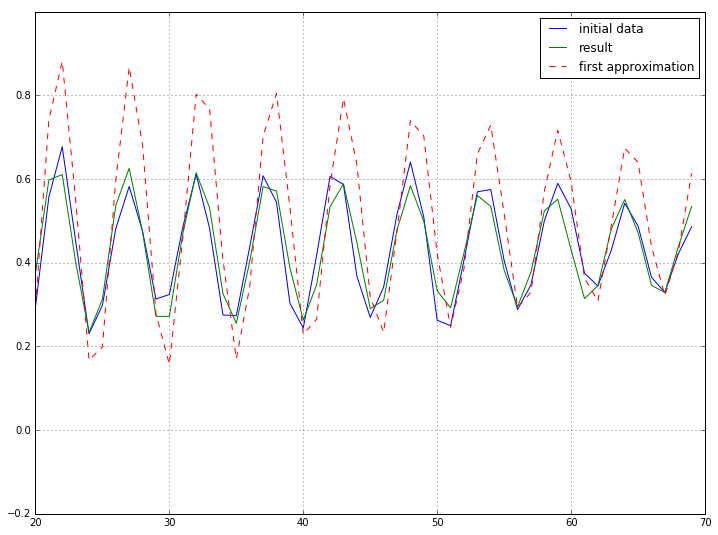

In [90]:
result2 = (a0*t + a1)*np.sin(a2*t + a3) + a4

plt.plot(range(tmin, tmax), data[tmin:tmax], '-', label='initial data')
plt.plot(range(tmin, tmax), result2, label='result')
plt.plot(range(tmin, tmax), first_appx, '--', label='first approximation')
plt.axis([tmin, tmax, -0.2, 1.0])
plt.grid(True)
plt.legend()
plt.show()

In [93]:
mse = ((data[tmin:tmax] - result2)**2).mean()
print mse

0.00189609263824


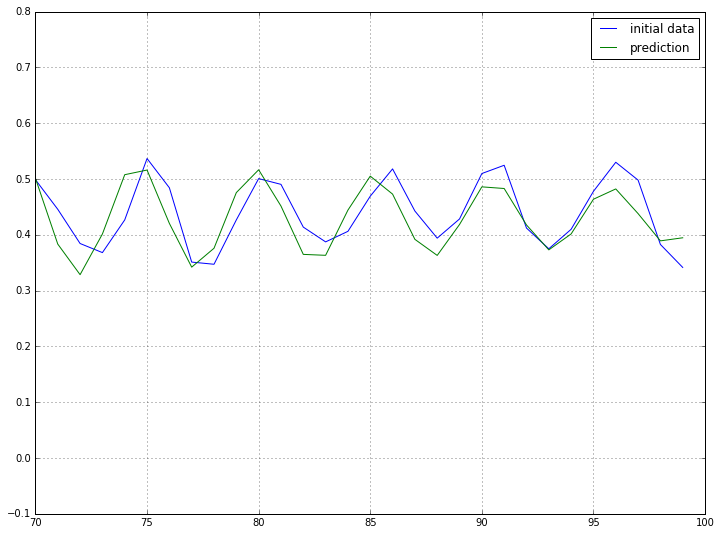

In [91]:
t2 = np.arange(tmax, 100)
predict = (a0*t2 + a1)*np.sin(a2*t2 + a3) + a4

plt.plot(range(tmax,100), data[tmax:], '-', label='initial data')
plt.plot(range(tmax,100), predict, label='prediction')
plt.axis([tmax, 100, -0.1, 0.8])
plt.grid(True)
plt.legend()
plt.show()

In [92]:
mse = ((data[tmax:] - predict)**2).mean()
print mse

0.00156666670034
